YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Index Type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Columns: MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])
Data Head:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716087  72.776613  71.466827  71.721034  135480400
2020-01-03  72.009117  72.771745  71.783962  71.941328  146322800
2020-01-06  72.582886  72.621623  70.876053  71.127844  118387200
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


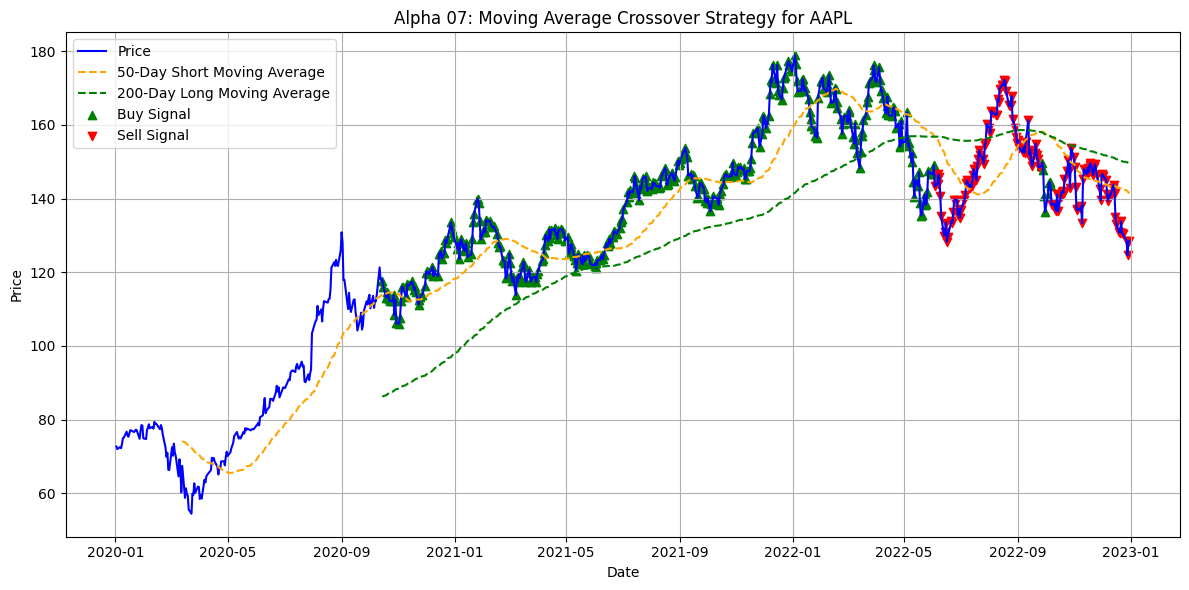

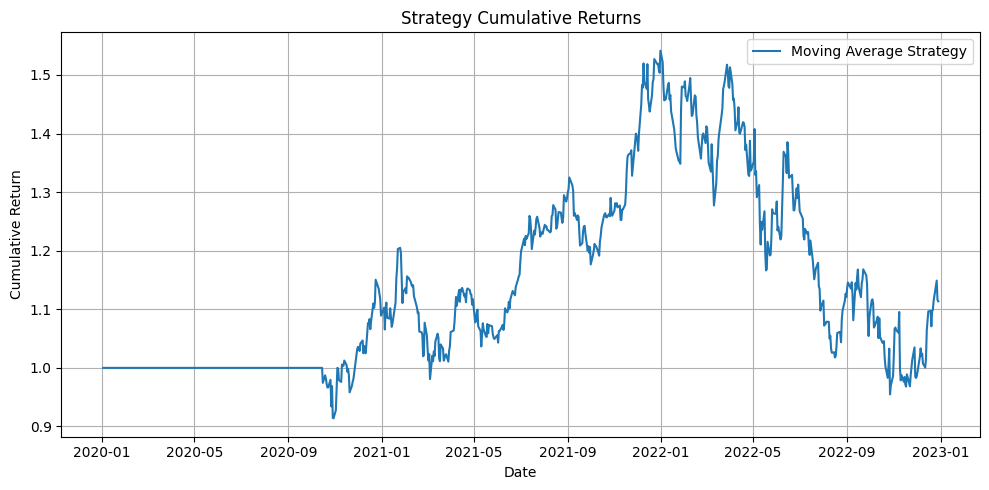

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# === Download historical data ===
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2023-01-01")

# === Check structure of data ===
print(f"Index Type: {type(data.index)}")
print(f"Columns: {data.columns}")
print(f"Data Head:\n{data.head()}")

# === Access the 'Close' column properly for the 'AAPL' ticker ===
price = data[('Close', 'AAPL')]  # Use tuple to access the 'Close' column for 'AAPL'

# === Moving Average calculations ===
short_window = 50  # Short-term moving average (50 days)
long_window = 200  # Long-term moving average (200 days)

# Calculate moving averages
short_mavg = price.rolling(window=short_window).mean()
long_mavg = price.rolling(window=long_window).mean()

# === Generate signals ===
signals = pd.Series(index=price.index, dtype='float64')

# Buy signal: Short moving average crosses above the long moving average
signals[short_mavg > long_mavg] = 1  # Buy signal
# Sell signal: Short moving average crosses below the long moving average
signals[short_mavg < long_mavg] = -1  # Sell signal
signals.fillna(0, inplace=True)

# === Backtest ===
daily_returns = price.pct_change().shift(-1)
strategy_returns = signals.shift(1) * daily_returns
cumulative_returns = (1 + strategy_returns).cumprod()

# === Plot price and moving averages ===
plt.figure(figsize=(12, 6))
plt.plot(price, label='Price', color='blue')
plt.plot(short_mavg, label=f'{short_window}-Day Short Moving Average', linestyle='--', color='orange')
plt.plot(long_mavg, label=f'{long_window}-Day Long Moving Average', linestyle='--', color='green')

# Highlight Buy and Sell signals
plt.scatter(price.index[signals == 1], price[signals == 1], marker='^', color='g', label='Buy Signal', alpha=1)
plt.scatter(price.index[signals == -1], price[signals == -1], marker='v', color='r', label='Sell Signal', alpha=1)

plt.title(f'Alpha 07: Moving Average Crossover Strategy for {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# === Plot cumulative returns ===
plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns, label='Moving Average Strategy')
plt.title("Strategy Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
